In [2]:
# import all librarys
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [4]:
# Set `main_dir` to the location of your `af-werx` folder (for Mac).
data_dir = '/Users/datasociety/Desktop/af-werx/data'

In [6]:
# Set working directory.
os.chdir(data_dir)

In [7]:
# Check working directory.
print(os.getcwd())

/Users/datasociety/Desktop/af-werx/data


In [10]:
household_poverty = pd.read_csv("costa_rica_poverty.csv")
household_poverty.head()

,household_id,ind_id,rooms,tablet,males_under_12,males_over_12,males_tot,females_under_12,females_over_12,females_tot,...,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,rural_zone,age,Target,monthly_rent
0,21eb7fcc1,ID_279628684,3,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,43,4,190000.0
1,0e5d7a658,ID_f29eb3ddd,4,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,67,4,135000.0
2,2c7317ea8,ID_68de51c94,8,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,92,4,NaN
3,2b58d945f,ID_d671db89c,5,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,17,4,180000.0
4,2b58d945f,ID_d56d6f5f5,5,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,37,4,180000.0


In [12]:
costa_viz = household_poverty[['ppl_total', 'dependency_rate', 'num_adults', 'rooms', 'age', 'monthly_rent','Target']]
costa_viz.head()


,ppl_total,dependency_rate,num_adults,rooms,age,monthly_rent,Target
0,1,37,1,3,43,190000.0,4
1,1,36,1,4,67,135000.0,4
2,1,36,1,8,92,NaN,4
3,4,38,2,5,17,180000.0,4
4,4,38,2,5,37,180000.0,4


In [13]:
costa_viz.isnull().sum()

ppl_total             0
dependency_rate       0
num_adults            0
rooms                 0
age                   0
monthly_rent       6860
Target                0
dtype: int64

In [14]:
# Set the dataframe equal to the imputed dataset.
costa_viz = costa_viz.fillna(costa_viz.mean())
# Check how many values are null in monthly_rent.
costa_viz.isnull().sum()

ppl_total          0
dependency_rate    0
num_adults         0
rooms              0
age                0
monthly_rent       0
Target             0
dtype: int64

In [16]:
# use where function to change Target column to text uns where function
costa_viz['Target'] = np.where(costa_viz['Target'] <= 3, 'vulnerable', 'non_vulnerable')

TypeError: '<=' not supported between instances of 'str' and 'int'

In [18]:
costa_viz['Target'].head()

0    non_vulnerable
1    non_vulnerable
2    non_vulnerable
3    non_vulnerable
4    non_vulnerable
Name: Target, dtype: object

In [19]:
# get type of 'Target' variable
print(costa_viz.Target.dtypes)

object


In [20]:
costa_viz["Target"] = np.where(costa_viz["Target"] == "non_vulnerable", True, False)
# Check class again.
print(costa_viz.Target.dtypes)

bool


In [23]:
# Group data by `Target` variable.
grouped = costa_viz.groupby('Target')
grouped.head()

,ppl_total,dependency_rate,num_adults,rooms,age,monthly_rent,Target
0,1,37,1,3,43,190000.000000,True
1,1,36,1,4,67,135000.000000,True
2,1,36,1,8,92,165231.606971,True
3,4,38,2,5,17,180000.000000,True
4,4,38,2,5,37,180000.000000,True
50,4,38,2,5,8,120000.000000,False
51,4,38,2,5,44,120000.000000,False
52,4,38,2,5,14,120000.000000,False
53,4,38,2,5,42,120000.000000,False
58,1,36,1,1,71,40000.000000,False


In [25]:
# Compute mean on the listed variables using the grouped data.
costa_grouped_mean = grouped.mean()[['ppl_total','dependency_rate','num_adults','rooms','age']]
costa_grouped_mean

,ppl_total,dependency_rate,num_adults,rooms,age
Target,,,,,
False,4.358607,26.011233,2.388093,4.533839,31.314238
True,3.796531,25.425284,2.713809,5.205971,36.078886


In [26]:
# Reset index of the dataset.
costa_grouped_mean = costa_grouped_mean.reset_index() 
costa_grouped_mean

,Target,ppl_total,dependency_rate,num_adults,rooms,age
0,False,4.358607,26.011233,2.388093,4.533839,31.314238
1,True,3.796531,25.425284,2.713809,5.205971,36.078886


In [27]:
# Melt the wide data into long.
costa_grouped_mean_long = pd.melt(costa_grouped_mean, #<- wide dataset
                                  id_vars = ['Target'], #<- identifying variable
                                  var_name = 'metric', #<- contains col names of wide data 
                                  value_name = 'mean') #<- contains values from above columns

costa_grouped_mean_long


,Target,metric,mean
0,False,ppl_total,4.358607
1,True,ppl_total,3.796531
2,False,dependency_rate,26.011233
3,True,dependency_rate,25.425284
4,False,num_adults,2.388093
5,True,num_adults,2.713809
6,False,rooms,4.533839
7,True,rooms,5.205971
8,False,age,31.314238
9,True,age,36.078886


In [28]:
# Melt the long data into wide.
costa_grouped_mean_wide = costa_grouped_mean_long.pivot(
                    index = 'Target', #<- identifying variable
                    columns = 'metric', #<- col names of wide data
                    values = 'mean') #<- values from above columns
costa_grouped_mean_wide


metric,age,dependency_rate,num_adults,ppl_total,rooms
Target,,,,,
False,31.314238,26.011233,2.388093,4.358607,4.533839
True,36.078886,25.425284,2.713809,3.796531,5.205971


In [29]:
# import matplotlib library
import matplotlib.pyplot as plt

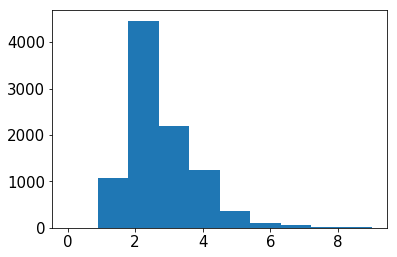

In [33]:
# plot basic histogram
plt.rcParams.update({'font.size': 15}) 
plt.hist(costa_viz['num_adults']) 
plt.show()

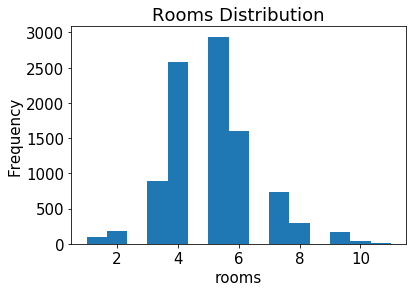

In [41]:
# modify the histogram
plt.hist(costa_viz['rooms'], bins = 15) # bins = num of bars
plt.xlabel('rooms') #label x-axis
plt.ylabel('Frequency') #label y-axis 
plt.title('Rooms Distribution') # plot title
plt.show()

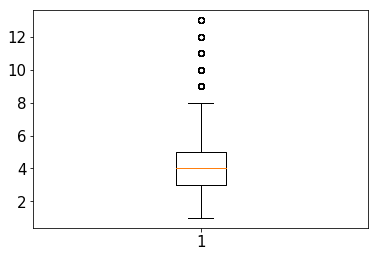

In [42]:
# boxplot
plt.boxplot(costa_viz['ppl_total'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x121407940>,
 'caps': [<matplotlib.lines.Line2D at 0x121407fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x121407518>],
 'medians': [<matplotlib.lines.Line2D at 0x1214126a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1214129e8>],
 'means': []}

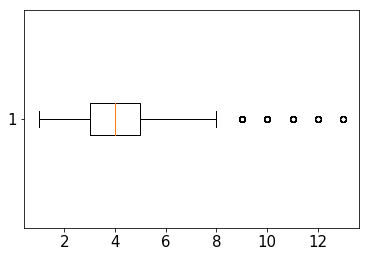

In [43]:
# switch orienation of boxplot using vert = 
plt.boxplot(costa_viz['ppl_total'], vert = False)

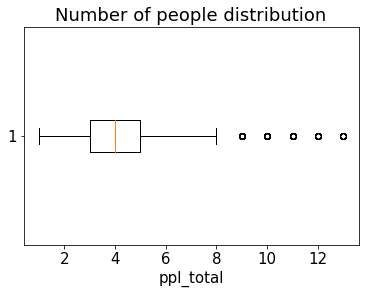

In [45]:
# same as before
plt.boxplot(costa_viz['ppl_total'], vert = False)
# add formatting
plt.xlabel('ppl_total') #<- label x-axis 
# Add plot title
plt.title('Number of people distribution')
plt.show()

In [46]:
# filter out for only TRUE in target and keep metric and mean columns
costa_true_means = costa_grouped_mean_long.query('Target == True')[['metric','mean']] 
print(costa_true_means)

            metric       mean
1        ppl_total   3.796531
3  dependency_rate  25.425284
5       num_adults   2.713809
7            rooms   5.205971
9              age  36.078886


In [49]:
# setup for barchart
bar_labels = costa_true_means['metric'] #categories from metric column 
bar_heights = costa_true_means['mean'] # bar height based on mean 
num_bars = len(bar_heights) # setting against bar heights
bar_positions = np.arange(num_bars) # range of numbers for y-axis from num_bars

In [51]:
print(bar_labels)
print(bar_positions)
print(bar_heights)

1          ppl_total
3    dependency_rate
5         num_adults
7              rooms
9                age
Name: metric, dtype: object
[0 1 2 3 4]
1     3.796531
3    25.425284
5     2.713809
7     5.205971
9    36.078886
Name: mean, dtype: float64


<BarContainer object of 5 artists>

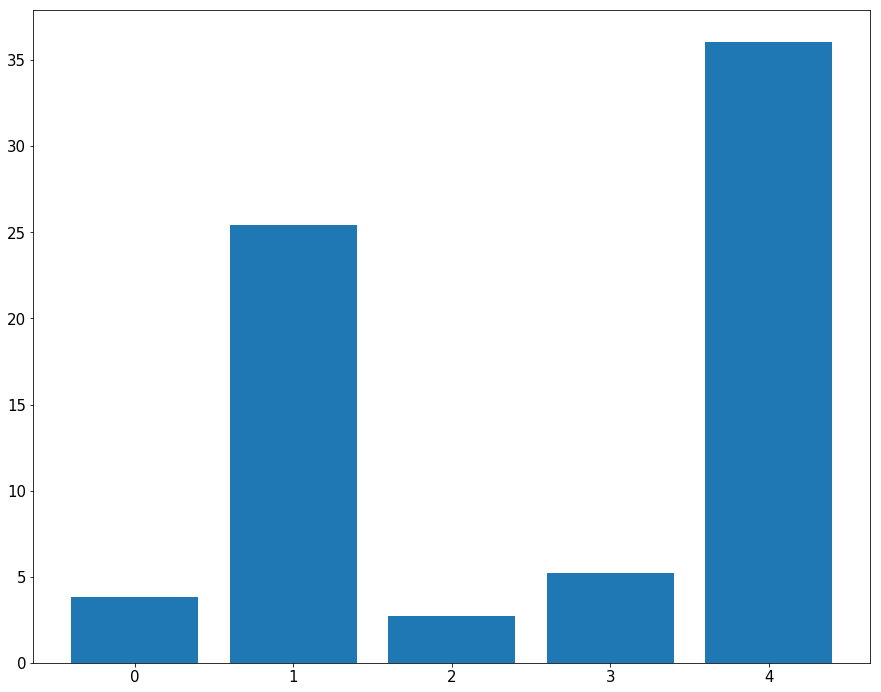

In [52]:
 # Adjust figure size before plotting.
plt.figure(figsize = (15, 12))
plt.bar(bar_positions, bar_heights)

([<matplotlib.axis.XTick at 0x120ed34e0>,
 <a list of 5 Text xticklabel objects>)

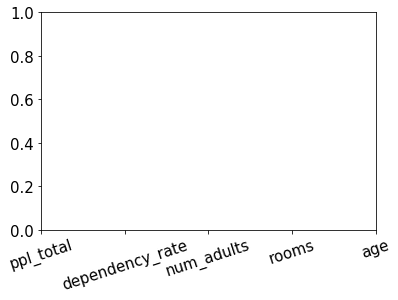

In [53]:
plt.xticks(bar_positions, bar_labels,
rotation = 18)

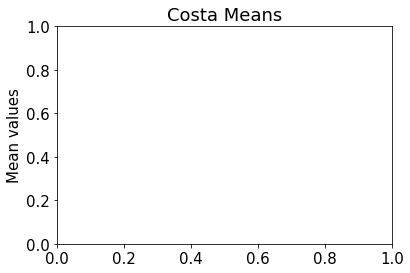

In [55]:
plt.ylabel('Mean values')
plt.title('Costa Means') #<- add plot title 
plt.show()

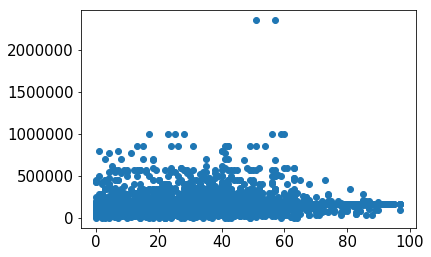

In [56]:
# basic scatterplot
plt.scatter(costa_viz['age'],
            costa_viz['monthly_rent'])
plt.show()

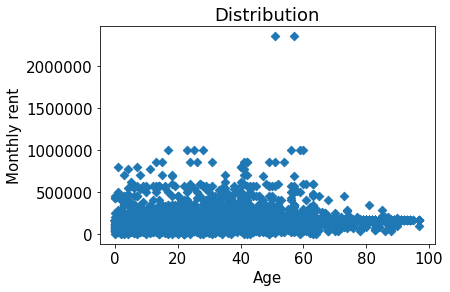

In [57]:
# add formating
plt.scatter(costa_viz['age'], 
            costa_viz['monthly_rent'],
            marker = "D") #<- set marker type to diamond
plt.xlabel('Age')
plt.ylabel('Monthly rent') 
plt.title('Distribution') 
plt.show()

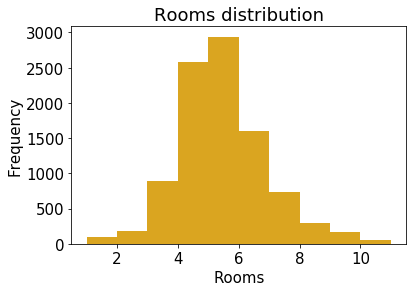

In [58]:
# create histogram with 'goldenrod color' using facecolor
plt.hist(costa_viz['rooms'],
         facecolor = 'goldenrod') #<- set color
plt.xlabel('Rooms') 
plt.ylabel('Frequency') 
plt.title('Rooms distribution') 
plt.show()

<BarContainer object of 5 artists>

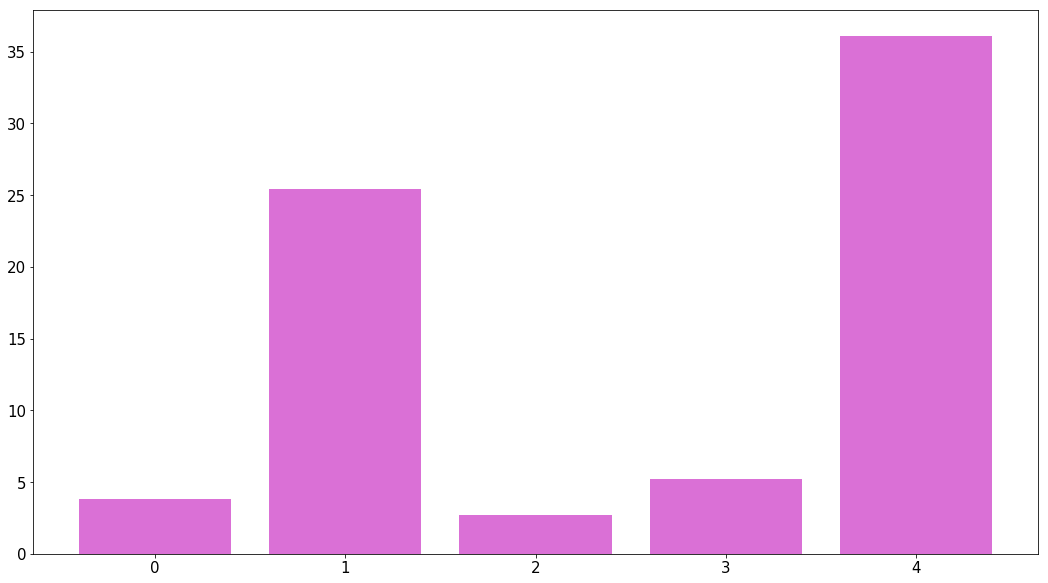

In [59]:
# using 'color' function instead
plt.figure(figsize = (18, 10)) 
plt.bar(bar_positions,
        bar_heights, 
        color = "orchid")

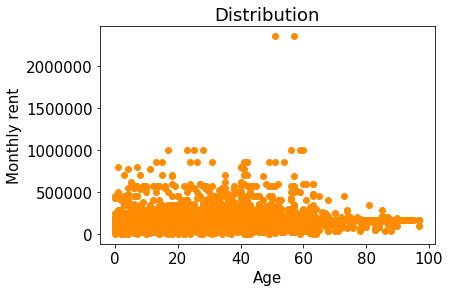

In [60]:
# set color using 'c'
plt.scatter(costa_viz['age'], 
            costa_viz['monthly_rent'],
            c = 'darkorange') #<- set marker type to diamond
plt.xlabel('Age') 
plt.ylabel('Monthly rent') 
plt.title('Distribution')
plt.show()

In [61]:
# create color dictionary based on 
#variable value and asign to 'color'
color_dict = {True: 'darkseagreen', 
              False: 'palevioletred'}
color = costa_viz['Target'].map(color_dict)
print(color.head())

0    darkseagreen
1    darkseagreen
2    darkseagreen
3    darkseagreen
4    darkseagreen
Name: Target, dtype: object


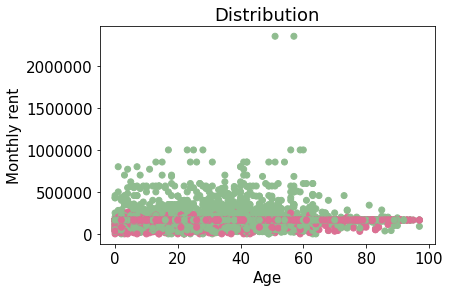

In [62]:
# use color dictionary in scatterplot
plt.scatter(costa_viz['age'], 
            costa_viz['monthly_rent'],
            c = color) # assign color to c variable
plt.xlabel('Age')
plt.ylabel('Monthly rent') 
plt.title('Distribution') 
plt.show()

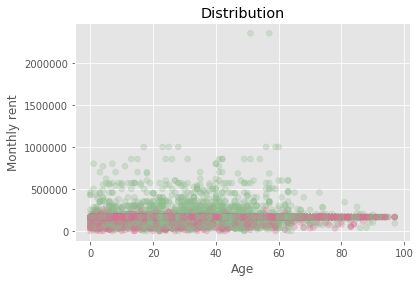

In [66]:
plt.scatter(costa_viz['age'],
            costa_viz['monthly_rent'],
            c = color,
            alpha = 0.3) # add transparency to marks
plt.xlabel('Age')
plt.ylabel('Monthly rent')
plt.title('Distribution') 
plt.show()

In [63]:
# Print all available styles.
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [67]:
# Use ggplot style in matplotlib.
plt.style.use('ggplot')

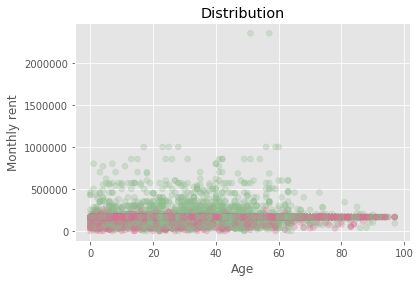

In [68]:
plt.scatter(costa_viz['age'],
            costa_viz['monthly_rent'],
            c = color, 
            alpha = 0.3)
plt.xlabel('Age')
plt.ylabel('Monthly rent') 
plt.title('Distribution') 
plt.show()

In [70]:
plt.rcParams['axes.labelsize'] = 20 
plt.rcParams['axes.labelcolor'] = 'red' 
plt.rcParams['axes.titlesize'] = 35

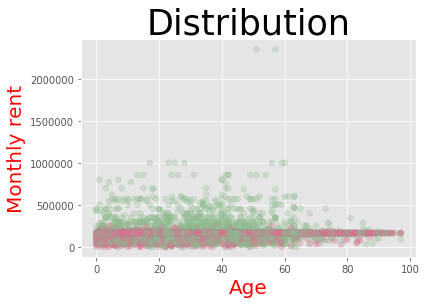

In [71]:
plt.scatter(costa_viz['age'],
            costa_viz['monthly_rent'],
            c = color,
            alpha = 0.3) 
plt.xlabel('Age')
plt.ylabel('Monthly rent') 
plt.title('Distribution') 
plt.show()

In [72]:
plt.rcdefaults()

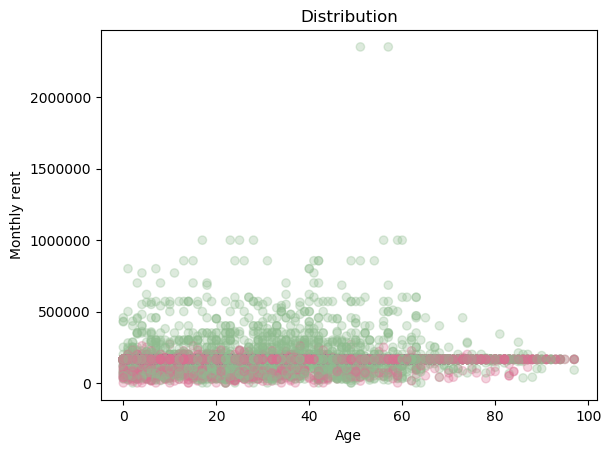

In [73]:
plt.scatter(costa_viz['age'],
            costa_viz['monthly_rent'],
            c = color, 
            alpha = 0.3)
plt.xlabel('Age') 
plt.ylabel('Monthly rent') 
plt.title('Distribution')
plt.show()

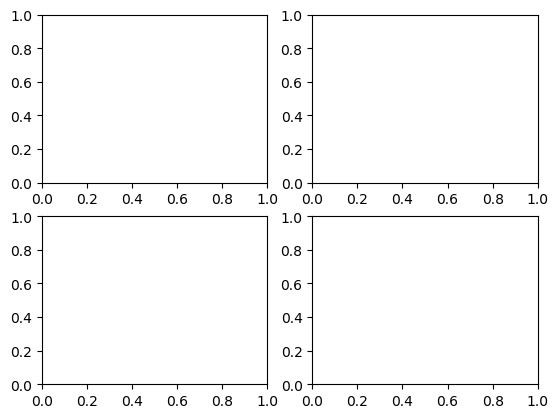

In [82]:
# compound visuals
# Create a 2 x 2 figure and axes grid.
fig, axes = plt.subplots(2, 2) 
plt.show()

In [75]:
print(axes)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x121547710>


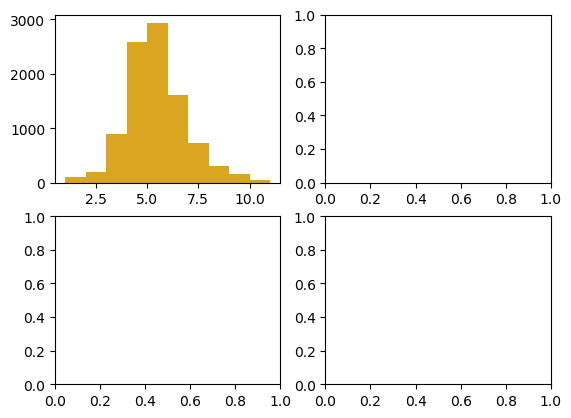

In [87]:
fig, axes = plt.subplots(2, 2) 
axes[0, 0].hist(costa_viz['rooms'],
                facecolor = 'goldenrod')
plt.show()

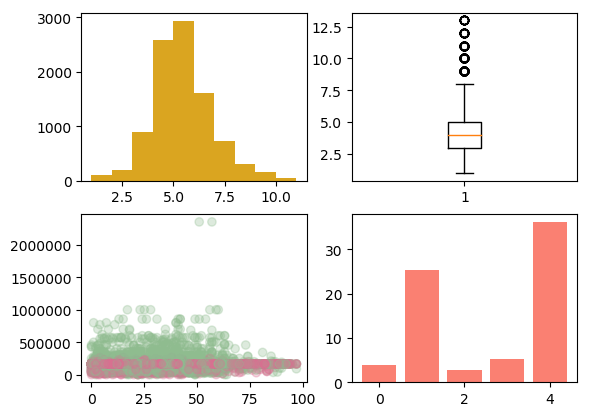

In [88]:
# declare the fig and axes in 2d array
fig, axes = plt.subplots(2, 2) 
# first plot as histogram
axes[0, 0].hist(costa_viz['rooms'],
                facecolor = 'goldenrod')
# 2nd plot as boxplot
axes[0, 1].boxplot(costa_viz['ppl_total']) 
# 3rd plot as scatter
axes[1, 0].scatter(costa_viz['age'],
                   costa_viz['monthly_rent'],
                   c = color,
                   alpha = 0.3)
# 4th as bar chart
axes[1, 1].bar(bar_positions,
               bar_heights,
               color = "salmon")
plt.show()

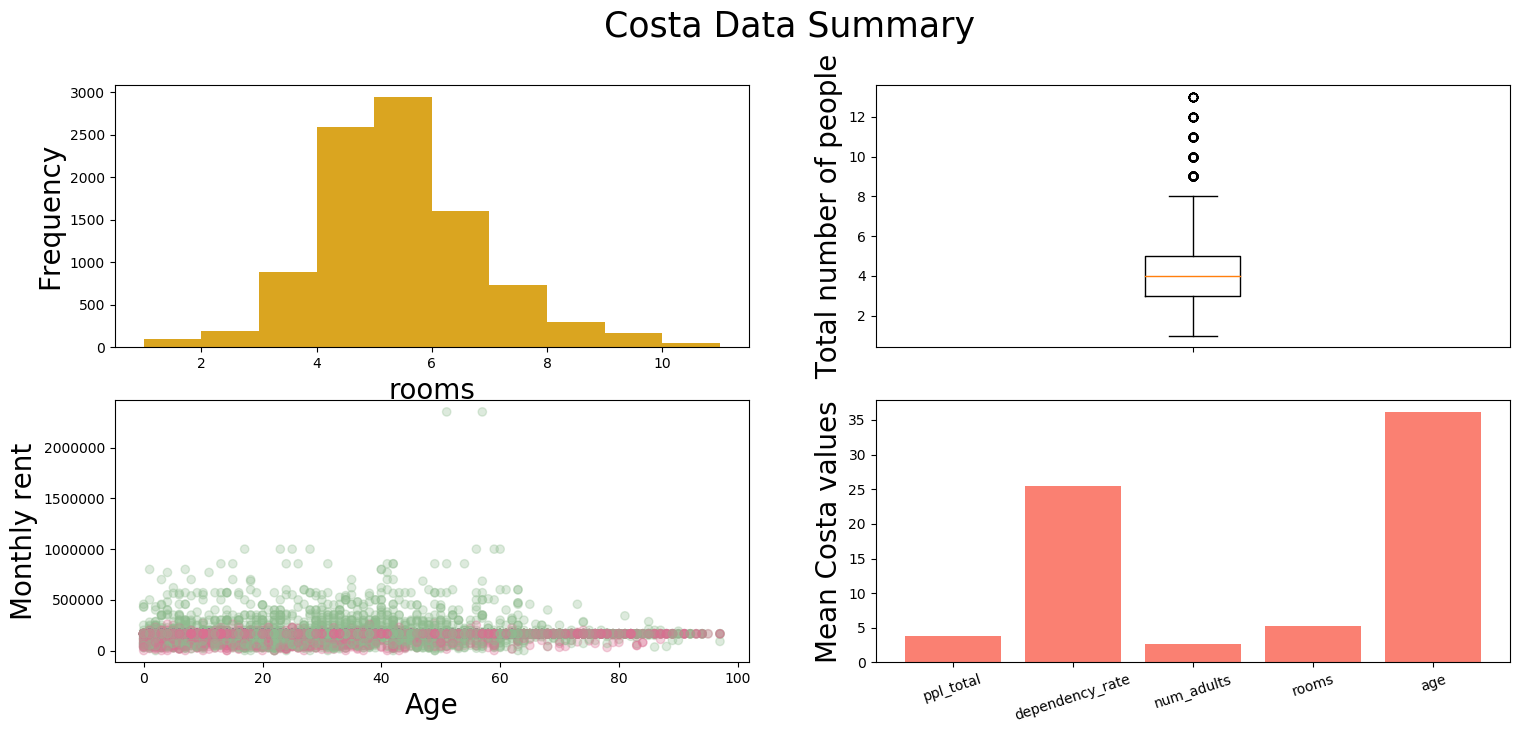

In [97]:
# declare the fig and axes in 2d array
fig, axes = plt.subplots(2, 2) 
# first plot as histogram
axes[0, 0].hist(costa_viz['rooms'],
                facecolor = 'goldenrod')
# 2nd plot as boxplot
axes[0, 1].boxplot(costa_viz['ppl_total']) 
# 3rd plot as scatter
axes[1, 0].scatter(costa_viz['age'],
                   costa_viz['monthly_rent'],
                   c = color,
                   alpha = 0.3)
# 4th as bar chart
axes[1, 1].bar(bar_positions,
               bar_heights,
               color = "salmon")
# Histogram of rooms distribution.
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlabel('rooms')
# Boxplot of ppl_total.
axes[0, 1].set_ylabel('Total number of people')
# Scatterplot of distribution.
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Monthly rent')
# Mean values of categories of variable means based on Target.
axes[1, 1].set_ylabel('Mean Costa values')
# No labels for ticks for boxplot.
axes[0, 1].xaxis.set_ticklabels([""])
# Tick positions set to bar positions in bar chart.
axes[1, 1].xaxis.set_ticks(bar_positions)
# Tick labels set to bar categories in bar chart.
axes[1, 1].xaxis.set_ticklabels(bar_labels,rotation = 18)
# figure adjustments
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['figure.titlesize'] = 25 
fig.set_size_inches(18, 7.5) 
fig.suptitle('Costa Data Summary') 
plt.show()

<Figure size 640x480 with 0 Axes>

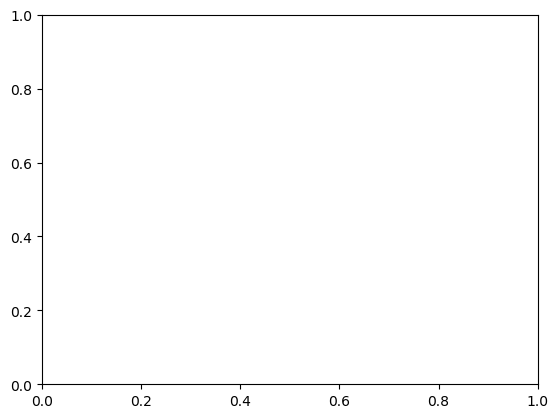

In [98]:
# clear plotting area
plt.clf() 
#create a new figure and axes objects for plotting
fig, axes = plt.subplots() 

<Figure size 640x480 with 0 Axes>

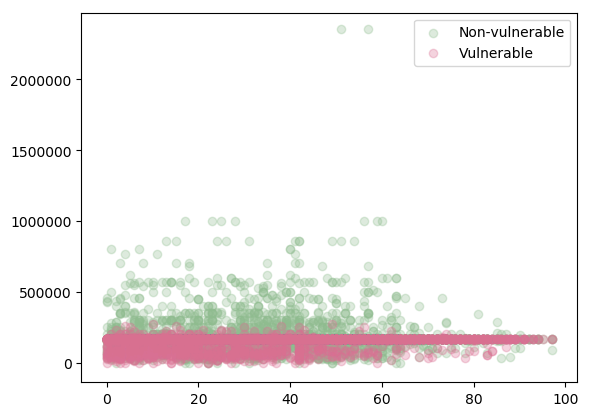

In [119]:
color_dict = {True: 'darkseagreen', 
              False: 'palevioletred'}
color = costa_viz['Target'].map(color_dict)
plt.clf()
fig, axes = plt.subplots() 
for key, value in color_dict.items():
    age = costa_viz.query('Target=='+str(key))['age']
    monthly_rent = costa_viz.query('Target=='+str(key))['monthly_rent']
    
    if key == 0:
        Flag = "Vulnerable" 
    else:
        Flag = "Non-vulnerable" 
        
    axes.scatter(age,
                 monthly_rent,
                 c = value,
                 label = Flag,
                 alpha = 0.3) 
             
axes.legend() #<- add a legend to get labels
plt.show()

In [120]:
# Let's get the `Target` = `False` mean data.
costa_false_means = costa_grouped_mean_long.query('Target == False')[['metric','mean']] 
print(costa_false_means)

            metric       mean
0        ppl_total   4.358607
2  dependency_rate  26.011233
4       num_adults   2.388093
6            rooms   4.533839
8              age  31.314238


<Figure size 640x480 with 0 Axes>

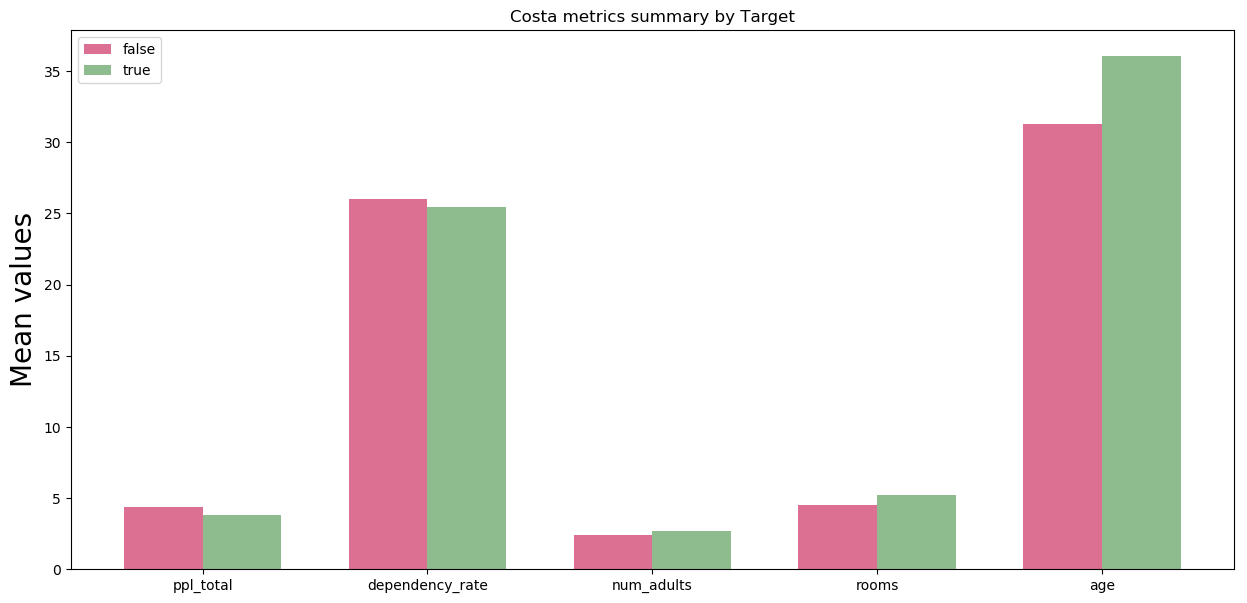

In [122]:
# Mean values for `Target` = `False` data.
false_bar_heights = costa_false_means['mean']
# Mean values for `Target` = `True` data.
true_bar_heights = costa_true_means['mean']
# Labels of bars, their width, and positions are shared for both categories. 
bar_labels = costa_false_means['metric']
num_bars = len(bar_labels) 
bar_positions = np.arange(num_bars) 
width = 0.35

# Clear the plotting area for the new plot.
plt.clf()
# Create the figure and axes objects.
fig, axes = plt.subplots()
# set bar config for true and false bars
false_bar_chart = axes.bar(bar_positions, # set bar positions
                           false_bar_heights, # set false bar heights 
                           width, # set width
                           color = color_dict[0]) # set color to false value
true_bar_chart = axes.bar(bar_positions + width,# set bar positions
                           true_bar_heights, # set false bar heights 
                           width, # set width
                           color = color_dict[1]) # set color to false value
# Add text for labels, title and axes ticks.
axes.set_ylabel('Mean values')
axes.set_title('Costa metrics summary by Target')
axes.set_xticks(bar_positions + width/2)
# set x-axis to bar labels
axes.set_xticklabels(bar_labels)

# Add a legend for each chart and corresponding labels.
axes.legend((false_bar_chart, true_bar_chart), ('false', 'true')) # Adjust figure size.
fig.set_size_inches(15, 7)
plt.show()

In [123]:
# saving your graphics!!
fig.savefig(data_dir + '/costa_metrics_by_target.png')

In [124]:
costa_grouped_mean_long.to_csv(data_dir + '/costa_summary_by_target.csv', index = False)